In [1]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import sys
from pathlib import Path

rcParams['figure.figsize'] = 3, 2
rcParams['font.size'] = 14
rcParams['axes.linewidth']=2
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

path = Path(os.getcwd())
project_path = path.parent.absolute()
figure_path = os.path.join(project_path, '_hemibrain', 'figures')
hemibrain_path = os.path.join(project_path, '_hemibrain')
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
def include_col_entries_by_substring(df, col, substrings):
    if isinstance(substrings, list):
        masks = []
        for substring in substrings:
            masks.append(df[col].str.contains(substring, na=False))
        mask = np.any(masks, axis=0)
        df = df[mask]
    else:
        df = df[df[col].str.contains(substrings, na=False)]
    return df

def exclude_col_entries_by_substring(df, col, substrings):
    if isinstance(substrings, list):
        for substring in substrings:
            df = df[~df[col].str.contains(substring, na=False)]
    else:
        df = df[~df[col].str.contains(substrings, na=False)]
    return df

def save_fig(save_path, figname='', dpi=1000, pdf=True, show=True):
    os.makedirs(save_path, exist_ok=True)
    plt.savefig(os.path.join(save_path, figname + '.png'),
                dpi=dpi,
                transparent=True)
    if pdf:
        plt.savefig(os.path.join(save_path, figname + '.pdf'), transparent=True)
    if show:
        plt.show()
    print('Figure saved at: {}'.format(os.path.join(save_path, figname)))
    plt.close()


def pretty_fig(figsize=(3, 2), rect=(0.3, 0.3, 0.5, 0.5), rows=1, cols=1):
    if rows > 1 or cols > 1:
        f, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
        for a in ax:
            plt.sca(a)
            sns.despine()
    else:
        f = plt.figure(figsize=figsize)
        ax = f.add_axes(rect)
    sns.despine()
    return f, ax

In [3]:
d = r'C:\Users\Peter\Dropbox\olfaction_evolution\hemibrain'
conns = 'traced-total-connections.csv'
names = 'traced-neurons.csv'

dfw = pd.read_csv(os.path.join(d, conns))
dfn = pd.read_csv(os.path.join(d, names))

In [4]:
dfn.head()

,bodyId,type,instance
0,200326126,CL141,CL141_L
1,202916528,FS4C,FS4C(FQ12)_C4_R
2,203253072,FS4A,FS4A(AB)(FQ12)_C3_R
3,203253253,SMP505,SMP505(PDM22)_L
4,203257652,FS4C,FS4C(FQ12)_C6_R


LH neurons

In [5]:
lhs = include_col_entries_by_substring(dfn, 'instance', 'LH')
print(lhs['instance'].count())
print(lhs['instance'].value_counts())

1495
LHPV6a1_R       14
LHAV5a2_a_R     14
LHAV2c1_R       13
LHAV6a1_b_R      8
LHAV2k4_R        8
                ..
LHPV5e1_R        1
LHPD4d2_a_R      1
LHPV4i2_R        1
LHCENT13_c_R     1
LHPV4j4_R        1
Name: instance, Length: 688, dtype: int64


MBONS

In [6]:
lhs = include_col_entries_by_substring(dfn, 'instance', 'MBON')
lhs = include_col_entries_by_substring(lhs, 'instance', '_R')
print(lhs['instance'].count())
print(lhs['instance'].value_counts())

44
MBON10(B'1)_R                3
MBON07(a1)_R                 2
MBON15(a'1)_R                2
MBON15-like(a'1a'2)_R        2
MBON12(y2a'1)_R              2
MBON19(a2p3p)_R              2
MBON14(a3)_R                 2
MBON11(y1pedc>a/B)_R         1
MBON01(y5B'2a)_R             1
MBON27(y5d)_R                1
MBON05(y4>y1y2)_R            1
MBON22(calyx)_R              1
MBON20(y1y2)_R               1
MBON06(B1>a)_R               1
MBON25(y1y2)_R               1
MBON34(y2)_R                 1
MBON32(y2)_R                 1
MBON02(B2B'2a)_R             1
MBON30(y1y2y3)_R             1
MBON33(y2y3)_R               1
MBON31(a'1a)_R               1
MBON21(y4y5)_R               1
MBON17(a'3m)_R               1
MBON04(B'2mp_bilateral)_R    1
MBON13(a'2)_R                1
MBON17-like(a'2a'3)_R        1
MBON16(a'3ap)_R              1
MBON24(B2y5)_R               1
MBON09(y3B'1)_R              1
MBON03(B'2mp)_R              1
MBON18(a2sc)_R               1
MBON23(a2sp)_R               1
MBON1

ORNS

In [7]:
orns = include_col_entries_by_substring(dfn, 'instance', 'OR')
print(orns['instance'].count())
print(orns['instance'].value_counts())

2
ORN_DM3_L    1
ORN_DM6_L    1
Name: instance, dtype: int64


KENYON CELLS

In [8]:
filtered = include_col_entries_by_substring(dfn, 'instance', 'KC')
print(filtered['instance'].count())
print(filtered['instance'].value_counts())

1931
KCg-m_R            590
KCab-m_R           354
KCab-c_R           252
KCab-s_R           223
KCa'b'-ap2_R       127
KCa'b'-m_R         119
KCg-d_R             99
KCa'b'-ap1_R        91
KCab-p_R            60
KCg-t_R              8
KC(incomplete?)      2
KCy(half)            2
KCg-s4_R             1
KCg-s1(super)_R      1
KCg-s3_R             1
KCg-s2(super)_R      1
Name: instance, dtype: int64


In [9]:
kcn = exclude_col_entries_by_substring(filtered, 'instance',
                                            ['KCg-s', 'KCy', 'incomplete'])
print(kcn['instance'].count())
print(kcn['instance'].value_counts())

1923
KCg-m_R         590
KCab-m_R        354
KCab-c_R        252
KCab-s_R        223
KCa'b'-ap2_R    127
KCa'b'-m_R      119
KCg-d_R          99
KCa'b'-ap1_R     91
KCab-p_R         60
KCg-t_R           8
Name: instance, dtype: int64


PNs

See https://elifesciences.org/articles/57443, Antennal lobe neuropil neurons
for nomenclature

In [10]:
filtered = dfn[dfn.instance.str.contains("PN", na=False)]
sorted(filtered['instance'].unique())

['DA1_lPN_R',
 'DA1_vPN_R',
 'DA2_lPN_R',
 'DA3_adPN_R',
 'DA4l_adPN_R',
 'DA4m_adPN_R',
 'DC1_adPN_R',
 'DC2_adPN_R',
 'DC3_adPN_R',
 'DC4_adPN_R',
 'DC4_vPN_R',
 'DL1_adPN_R',
 'DL2d_adPN_R',
 'DL2d_vPN_R',
 'DL2v_adPN_R',
 'DL3_lPN_R',
 'DL4_adPN_R',
 'DL5_adPN_R',
 'DM1_lPN_R',
 'DM2_lPN_R',
 'DM3_adPN_R',
 'DM3_vPN_R',
 'DM4_adPN_R',
 'DM4_vPN_R',
 'DM5_lPN_R',
 'DM6_adPN_R',
 'DP1l_adPN_R',
 'DP1l_vPN_R',
 'DP1m_adPN_R',
 'DP1m_vPN_R',
 'D_adPN_R',
 'LPN_R',
 'MZ_lv2PN_R',
 'MZ_lvPN(multiAL+SEZ)_R',
 'M_adPNm3_R',
 'M_adPNm4_R',
 'M_adPNm5_R',
 'M_adPNm6_R',
 'M_adPNm7_R',
 'M_adPNm8_R',
 'M_ilPN8t91_R',
 'M_ilPNm90_R',
 'M_imPNl92_R',
 'M_l2PN10t19_R',
 'M_l2PN3t18_R',
 'M_l2PNl20_R',
 'M_l2PNl21_R',
 'M_l2PNl22_R',
 'M_l2PNl23_R',
 'M_l2PNm14_R',
 'M_l2PNm15_R',
 'M_l2PNm16_R',
 'M_l2PNm17_R',
 'M_lPNm11A_R',
 'M_lPNm11B_R',
 'M_lPNm11C_R',
 'M_lPNm11D_R',
 'M_lPNm12_R',
 'M_lPNm13_R',
 'M_lv2PN9t49_R',
 'M_lvPNm24_R',
 'M_lvPNm25_R',
 'M_lvPNm26_R',
 'M_lvPNm27_R',
 'M_lvPNm28

In [11]:
filtered = include_col_entries_by_substring(dfn, 'instance', 'PN')
# mechanosensory wedge projection neurons. Not antennal lobe
filtered = exclude_col_entries_by_substring(filtered, 'instance', 'WEDPN')
# lateral posterior neuron, circadian clock neuron
filtered = exclude_col_entries_by_substring(filtered, 'instance', 'LPN')
# left antennal lobe neurons
filtered = exclude_col_entries_by_substring(filtered, 'instance', '_L')
# thermosensory, hygrosensory neurons
filtered = exclude_col_entries_by_substring(filtered, 'instance', 'VP')
# Subesophagael
filtered = exclude_col_entries_by_substring(filtered, 'instance', 'Z_')
# multiglomerular neurons
filtered = exclude_col_entries_by_substring(
    filtered,
    'instance',
    ['M_', 'MZ_lvPN', 'lv2PN'])

Uniglomerular PNs (either in the format of "gloname_" or "gloname+_", the latter suggesting that it targets a single glomerulus and another region)

In [12]:
mask = []
for v in filtered['instance']:
    v = v[:v.find('_')]
    if '+' not in v:
        mask.append(True)
    else:
        if v[-1] == '+':
            mask.append(True)
        else:
            mask.append(False)
uniglos = filtered[mask]
print(f'Number of unique uPNs: {len(np.unique(uniglos.instance))}')
sorted(np.unique(uniglos.instance))

Number of unique uPNs: 66


['DA1_lPN_R',
 'DA1_vPN_R',
 'DA2_lPN_R',
 'DA3_adPN_R',
 'DA4l_adPN_R',
 'DA4m_adPN_R',
 'DC1_adPN_R',
 'DC2_adPN_R',
 'DC3_adPN_R',
 'DC4_adPN_R',
 'DC4_vPN_R',
 'DL1_adPN_R',
 'DL2d_adPN_R',
 'DL2d_vPN_R',
 'DL2v_adPN_R',
 'DL3_lPN_R',
 'DL4_adPN_R',
 'DL5_adPN_R',
 'DM1_lPN_R',
 'DM2_lPN_R',
 'DM3_adPN_R',
 'DM3_vPN_R',
 'DM4_adPN_R',
 'DM4_vPN_R',
 'DM5_lPN_R',
 'DM6_adPN_R',
 'DP1l_adPN_R',
 'DP1l_vPN_R',
 'DP1m_adPN_R',
 'DP1m_vPN_R',
 'D_adPN_R',
 'VA1d_adPN_R',
 'VA1d_vPN_R',
 'VA1v_adPN_R',
 'VA1v_vPN_R',
 'VA2_adPN_R',
 'VA3_adPN_R',
 'VA4_lPN_R',
 'VA5_lPN_R',
 'VA6_adPN_R',
 'VA7l_adPN_R',
 'VA7m_lPN_R',
 'VC1_lPN_R',
 'VC2_lPN_R',
 'VC3l_adPN_R',
 'VC3m_lvPN_R',
 'VC4_adPN_R',
 'VC5_adPN_R',
 'VC5_lvPN_R',
 'VL1_ilPN',
 'VL1_vPN_R',
 'VL2a_adPN_R',
 'VL2a_vPN_R',
 'VL2p_adPN_R',
 'VL2p_vPN_R',
 'VM1_lPN_R',
 'VM2_adPN_R',
 'VM3_adPN_R',
 'VM4_adPN_R',
 'VM4_lvPN_R',
 'VM5d_adPN_R',
 'VM5v_adPN_R',
 'VM7d_adPN_R',
 'VM7v_adPN_R',
 'V_ilPN',
 'V_l2PN_R']

Biglo PNs

In [13]:
mask = []
for v in filtered['instance']:
    v = v[:v.find('_')]
    if '+' not in v:
        mask.append(False)
    else:
        if v[-1] == '+':
            mask.append(False)
        else:
            mask.append(True)
biglos = filtered[mask]
print(f'Number of unique bigloPNs: {len(np.unique(biglos.instance))}')
sorted(np.unique(biglos.instance))


Number of unique bigloPNs: 0


[]

Multiglomerular PNs

In [14]:
filtered = include_col_entries_by_substring(dfn, 'instance', 'PN')
multiglos = include_col_entries_by_substring(
    filtered,
    'instance',
    ['M_', 'MZ_'])
print(f'Number of unique mPNs: {len(np.unique(multiglos.instance))}')
sorted(np.unique(multiglos.instance))

Number of unique mPNs: 98


['MZ_lv2PN_R',
 'MZ_lvPN(multiAL+SEZ)_R',
 'M_adPNm3_R',
 'M_adPNm4_R',
 'M_adPNm5_R',
 'M_adPNm6_R',
 'M_adPNm7_R',
 'M_adPNm8_R',
 'M_ilPN8t91_R',
 'M_ilPNm90_R',
 'M_imPNl92_R',
 'M_l2PN10t19_R',
 'M_l2PN3t18_R',
 'M_l2PNl20_R',
 'M_l2PNl21_R',
 'M_l2PNl22_R',
 'M_l2PNl23_R',
 'M_l2PNm14_R',
 'M_l2PNm15_R',
 'M_l2PNm16_R',
 'M_l2PNm17_R',
 'M_lPNm11A_R',
 'M_lPNm11B_R',
 'M_lPNm11C_R',
 'M_lPNm11D_R',
 'M_lPNm12_R',
 'M_lPNm13_R',
 'M_lv2PN9t49_R',
 'M_lvPNm24_R',
 'M_lvPNm25_R',
 'M_lvPNm26_R',
 'M_lvPNm27_R',
 'M_lvPNm28_R',
 'M_lvPNm29_R',
 'M_lvPNm30_R',
 'M_lvPNm31_R',
 'M_lvPNm32_R',
 'M_lvPNm33_R',
 'M_lvPNm34_R',
 'M_lvPNm35_R',
 'M_lvPNm36_R',
 'M_lvPNm37_R',
 'M_lvPNm38_R',
 'M_lvPNm39_R',
 'M_lvPNm40_R',
 'M_lvPNm41_R',
 'M_lvPNm42_R',
 'M_lvPNm43_R',
 'M_lvPNm44_R',
 'M_lvPNm45_R',
 'M_lvPNm46_R',
 'M_lvPNm47_R',
 'M_lvPNm48_R',
 'M_smPN6t2_L',
 'M_smPNm1_L',
 'M_spPN4t9_R',
 'M_spPN5t10(PVM01)_L',
 'M_spPN5t10_R',
 'M_vPNml50_R',
 'M_vPNml51_R',
 'M_vPNml52_R',
 'M_vPNm

In [15]:
orn_id= orns.bodyId.to_numpy()
uniglo_id =uniglos.bodyId.to_numpy()
biglo_id =biglos.bodyId.to_numpy()
multiglo_id =multiglos.bodyId.to_numpy()
kc_id = kcn.bodyId.to_numpy()
lh_id = lhs.bodyId.to_numpy()

RESULTS:

##### ORN to uPN connectivity

In [16]:
mask1 = np.isin(dfw.bodyId_pre, orn_id)
mask2 = np.isin(dfw.bodyId_post, uniglo_id)
mask = np.all([mask1, mask2], axis=0)

dfw[mask]
# print(f'Average number of connections per ORN: '
#       f'{np.sum(mask) / len(dfw[mask].bodyId_pre.unique())}')


,bodyId_pre,bodyId_post,weight
2664357,1763149978,5813070872,14
2664363,1763149978,1764091241,17
2664367,1763149978,5813039235,11
2664368,1763149978,788306624,15
3545937,5901201372,1570685283,5
3545944,5901201372,755518957,28


In [17]:
dfn.head()

,bodyId,type,instance
0,200326126,CL141,CL141_L
1,202916528,FS4C,FS4C(FQ12)_C4_R
2,203253072,FS4A,FS4A(AB)(FQ12)_C3_R
3,203253253,SMP505,SMP505(PDM22)_L
4,203257652,FS4C,FS4C(FQ12)_C6_R


In [18]:
for id_orn, id_pn in zip(dfw[mask].bodyId_pre, dfw[mask].bodyId_post):
    print('hi')
    print(dfn.query(f'bodyId == {id_orn}').instance)
    print(dfn.query(f'bodyId == {id_pn}').instance)


hi
15867    ORN_DM6_L
Name: instance, dtype: object
20992    DM6_adPN_R
Name: instance, dtype: object
hi
15867    ORN_DM6_L
Name: instance, dtype: object
15870    DM6_adPN_R
Name: instance, dtype: object
hi
15867    ORN_DM6_L
Name: instance, dtype: object
19987    DM6_adPN_R
Name: instance, dtype: object
hi
15867    ORN_DM6_L
Name: instance, dtype: object
5954    DM6_adPN_R
Name: instance, dtype: object
hi
21601    ORN_DM3_L
Name: instance, dtype: object
14477    DM3_vPN_R
Name: instance, dtype: object
hi
21601    ORN_DM3_L
Name: instance, dtype: object
5562    DM3_adPN_R
Name: instance, dtype: object


Recurrent connections between KCs are extensive???

In [19]:
mask1 = np.isin(dfw.bodyId_pre, kc_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of recurrent connections per KC: '
      f'{np.sum(mask) / len(dfw[mask].bodyId_pre.unique())}')


Average number of recurrent connections per KC: 175.7155486219449


Connections from biglo and multiglomerular PNs to KCs are negligible

In [20]:
mask1 = np.isin(dfw.bodyId_pre, biglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of biglo connections to each KC: '
      f'{np.sum(mask) / len(kc_id)}')

mask1 = np.isin(dfw.bodyId_pre, multiglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of multiglo connections to each KC: '
      f'{np.sum(mask) / len(kc_id)}')

Average number of biglo connections to each KC: 0.0
Average number of multiglo connections to each KC: 0.14716588663546543


Connections from uniglo PNs to KCs are around ~6

In [21]:
mask1 = np.isin(dfw.bodyId_pre, uniglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of uniglo connections to each KC: '
      f'{np.sum(mask) / len(kc_id)}')

Average number of uniglo connections to each KC: 5.8335933437337495


On the other hand, connections from mPNs to LH is extensive

In [22]:
mask1 = np.isin(dfw.bodyId_pre, multiglo_id)
mask2 = np.isin(dfw.bodyId_post, lh_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of mglo connections to each LH: '
      f'{np.sum(mask) / len(kc_id)}')


Average number of mglo connections to each LH: 0.07384295371814872


Distribution of K

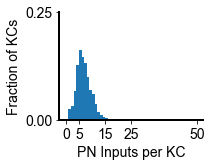

Figure saved at: C:\Users\Peter\PycharmProjects\olfaction_evolution\_hemibrain\figures\K


In [23]:
mask1 = np.isin(dfw.bodyId_pre, uniglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
pn2kc = dfw[mask]

kc_stats = pn2kc.groupby(['bodyId_post']).count()
input_degree = kc_stats['bodyId_pre']

f, ax = pretty_fig(figsize=[4, 3])
plt.hist(input_degree, range=[0, 50], bins=50, density=True)
plt.xticks([0, 5, 15, 25, 50]);
plt.xlabel('PN Inputs per KC')
plt.ylabel('Fraction of KCs')
plt.yticks([0, 0.25])
plt.ylim([0, 0.25])

save_fig(figure_path, 'K')
np.save(os.path.join(hemibrain_path, 'K'),
        input_degree.to_numpy())

Distribution of PN2KC weights

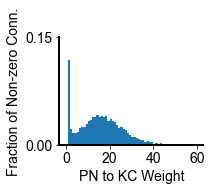

Figure saved at: C:\Users\Peter\PycharmProjects\olfaction_evolution\_hemibrain\figures\PN2KC_weight


In [24]:
mask1 = np.isin(dfw.bodyId_pre, uniglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
pn2kc = dfw[mask]

pn2kc_weights = pn2kc.weight.to_numpy()

f, ax = pretty_fig(figsize=[4, 3])
plt.hist(pn2kc_weights, range=[0, 60], bins=60, density=True)
plt.xticks(np.arange(0, 61, 20));
plt.xlabel('PN to KC Weight')
plt.ylabel('Fraction of Non-zero Conn.')
plt.yticks([0, 0.15])
plt.ylim([0, 0.15])

save_fig(figure_path, 'PN2KC_weight')
np.save(os.path.join(hemibrain_path, 'PN2KC_weight'),
        pn2kc_weights)


Distribution of output connections per PN is most definitely not equal between
 different glomeruli

Text(0.5, 1.0, 'Number of output connections per glomerulus (sorted by count)')

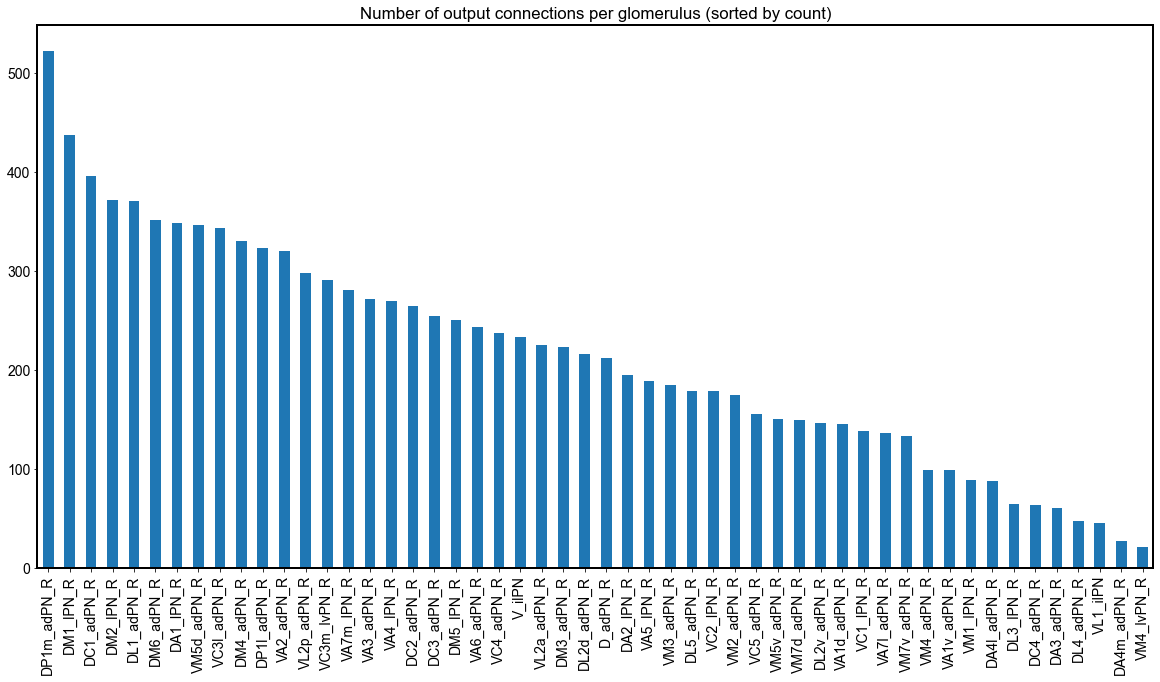

In [25]:
mask1 = np.isin(dfw.bodyId_pre, uniglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
pn2kc = dfw[mask]

uniglos = uniglos.sort_values(by='instance')
id_to_glo = dict(zip(uniglos['bodyId'], uniglos['instance']))
glos = pn2kc.bodyId_pre.map(id_to_glo)
a = glos.value_counts()


f = plt.figure(figsize=(20, 10))
ax = plt.gca()
a.plot(kind='bar', ax=ax)
plt.title('Number of output connections per glomerulus (sorted by count)')


Text(0.5, 1.0, 'Number of output connections per glomerulus (sorted by name)')

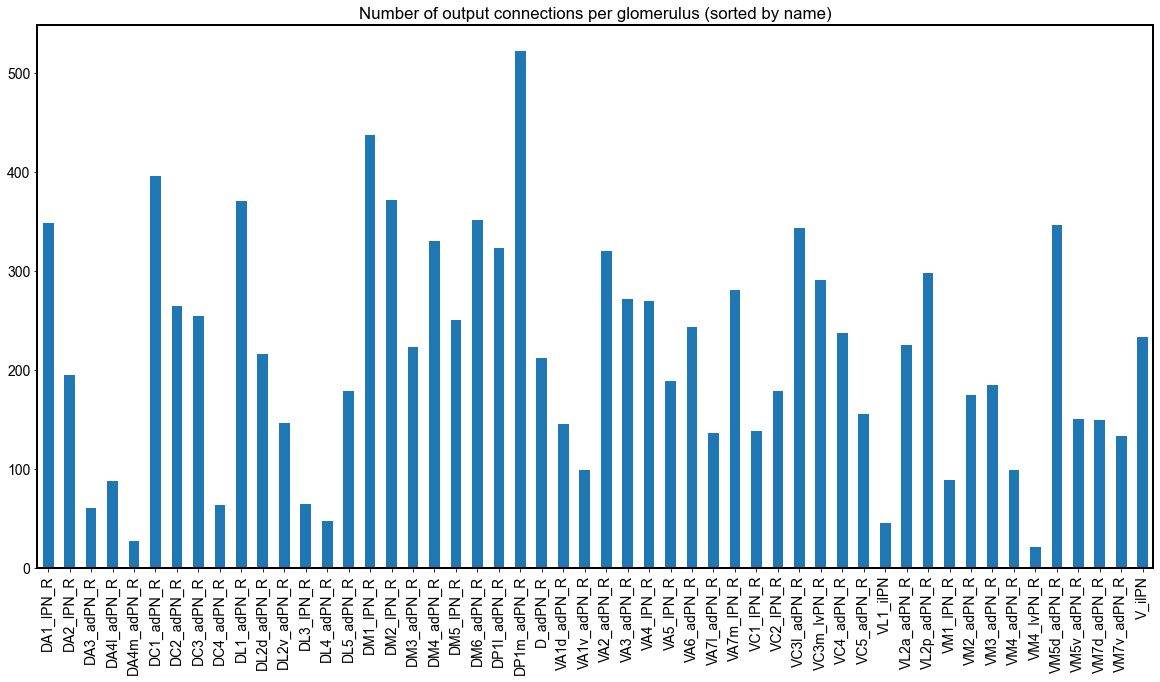

In [26]:
b = a.sort_index()
f = plt.figure(figsize=(20, 10))
ax = plt.gca()
b.plot(kind='bar', ax=ax)
plt.title('Number of output connections per glomerulus (sorted by name)')